In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("..\\Data\\train.csv")
test_data = pd.read_csv("..\\Data\\test.csv")

## 在 Train Set 當中 "Age", "Cabin", "Embarked" 含有 NaN

In [ ]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 依序查看 "Age", "Cabin", "Fare" 對 "Survived" 的影響

C:\Users\111321075\AppData\Local\Temp\ipykernel_14416\1954132208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_vs_survived["Age"] = df_age_vs_survived["Age"].apply(lambda x : x // 16)


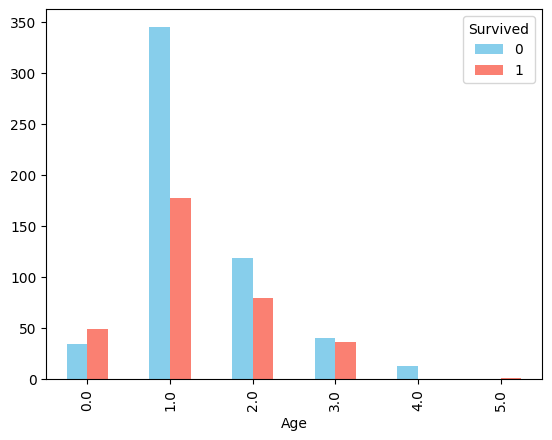

In [478]:
df_age_vs_survived = train_data[['Age', 'Survived']]

df_age_vs_survived["Age"] = df_age_vs_survived["Age"].apply(lambda x : x // 16)
df_age_vs_survived.groupby(['Age', 'Survived']).size().unstack(fill_value=0).plot(kind='bar', color=['skyblue', 'salmon'])

plt.show()

C:\Users\111321075\AppData\Local\Temp\ipykernel_14416\3130275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cabin_vs_survived["Cabin"] = df_cabin_vs_survived["Cabin"].notna().astype(int)


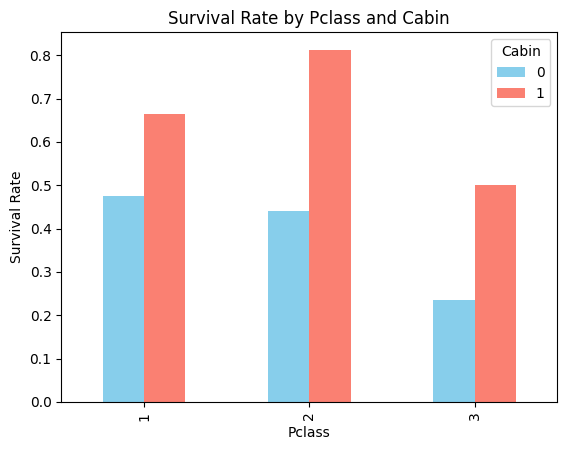

In [ ]:
# Create a DataFrame with 'Cabin' and 'Survived'
df_cabin_vs_survived = train_data[['Cabin', 'Survived', 'Pclass']]

df_cabin_vs_survived["Cabin"] = df_cabin_vs_survived["Cabin"].notna().astype(int)

cabin_pclass_survival = df_cabin_vs_survived.groupby(['Pclass', 'Cabin'])['Survived'].mean().unstack()

cabin_pclass_survival.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass and Cabin')

# Show the plot
plt.show()


C:\Users\111321075\AppData\Local\Temp\ipykernel_14416\4233263328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare_vs_survived['Fare'] = pd.qcut(df_fare_vs_survived['Fare'], qcut_size, labels=range(qcut_size))


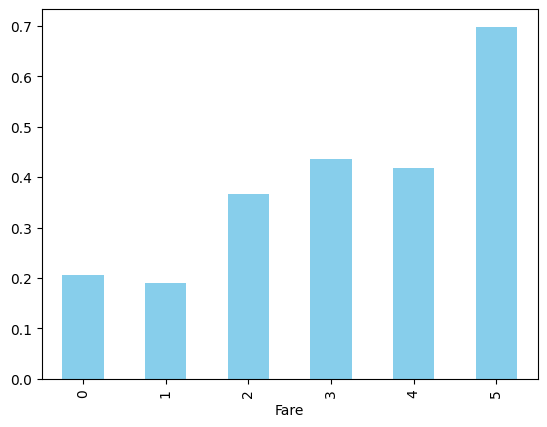

Fare
0    156
1    152
3    149
5    149
4    146
2    139
Name: count, dtype: int64

In [594]:
df_fare_vs_survived = train_data[['Fare', 'Survived']]

qcut_size = 6
df_fare_vs_survived['Fare'] = pd.qcut(df_fare_vs_survived['Fare'], qcut_size, labels=range(qcut_size))
df_fare_vs_survived.groupby('Fare')['Survived'].mean().plot(kind='bar',color='skyblue')

plt.show()
df_fare_vs_survived['Fare'].value_counts()

## 在 Test Set 當中 "Age", "Cabin", "Fare" 含有 NaN

In [595]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 處理有 NaN 的 features
- Train Set : "Age", "Cabin", "Embarked"
- Test Set : "Age", "Cabin", "Fare"

In [ ]:
train_data[train_data["Fare"] ==  8.0500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.05,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.05,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.05,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,30.726645,0,0,S.C./A.4. 23567,8.05,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,30.726645,0,0,374746,8.05,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,30.726645,0,0,SOTON/OQ 392086,8.05,NaN,S
89,90,0,3,"Celotti, Mr. Francesco",male,24.000000,0,0,343275,8.05,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.000000,0,0,343276,8.05,NaN,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,30.726645,0,0,374910,8.05,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.000000,0,0,324669,8.05,NaN,S


In [ ]:
# Train Set
mean_age_male = train_data[(train_data["Age"].notna()) & (train_data["Sex"] == "male")]["Age"].mean()
female_age_male = train_data[(train_data["Age"].notna()) & (train_data["Sex"] == "male")]["Age"].mean()

train_data.loc[(train_data["Age"].isna()) & (train_data["Sex"] == "male"), "Age"] = mean_age_male
train_data.loc[(train_data["Age"].isna()) & (train_data["Sex"] == "female"), "Age"] = female_age_male

train_data["Cabin"] = train_data["Cabin"].notna().astype(int)


# Test Set
test_data.loc[(test_data["Age"].isna()) & (test_data["Sex"] == "male"), "Age"] = mean_age_male
test_data.loc[(test_data["Age"].isna()) & (test_data["Sex"] == "female"), "Age"] = female_age_male

test_data["Cabin"] = test_data["Cabin"].notna().astype(int)

## 


In [ ]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})